In [2]:
import torch
import numpy as np
import pandas as pd
import os
import struct
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
import matplotlib.pyplot as plt
import random

random.seed(10) 

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda:0


In [4]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_rate=0.5):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.input_to_hidden = nn.Linear(input_size + hidden_size, hidden_size)
        self.hidden_to_output = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)  # 添加Dropout层
        
    def forward(self, x):
        batch_size = x.size(0)
        hidden = torch.zeros(batch_size, self.hidden_size).to(device) 
        for i in range(x.size(1)):
            combined = torch.cat((x[:, i, :], hidden), 1)
            hidden = self.relu(self.input_to_hidden(combined))
        hidden = self.dropout(hidden)
        output = self.hidden_to_output(hidden)
        return output



In [5]:
train = pd.read_csv("train1.csv")
test = pd.read_csv("test1.csv")

In [6]:
Y_train = train["label"].values
X_train = train.drop(labels=["label"], axis=1).values
Y_test = test["label"].values
X_test = test.drop(labels=["label"], axis=1).values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train_tensor = torch.Tensor(X_train).view(-1,28, 28).to(device)
X_test_tensor = torch.Tensor(X_test).view(-1, 28, 28).to(device)
Y_train_tensor = torch.LongTensor(Y_train).to(device)
Y_test_tensor = torch.LongTensor(Y_test).to(device) 

In [8]:
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [7]:
'''def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images = images.view(-1, 28, 28)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in train_loader:
                images = images.view(-1, 28, 28)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Accuracy: {accuracy}')



model = SimpleRNN(input_size=28, hidden_size=150, num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


# 进行训练
train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs=10)



SyntaxError: EOF while scanning triple-quoted string literal (1348187650.py, line 37)

In [8]:
'''
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        scheduler.step()  # Update the learning rate
        
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:  # It's more common to check accuracy on test set
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Accuracy: {accuracy}')

model = SimpleRNN(input_size=28, hidden_size=150, num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Set up the learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# 进行训练和评估
train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=10)
'''

Epoch 1/10, Loss: 0.8893617390315416, Accuracy: 0.7447
Epoch 2/10, Loss: 0.635727840032913, Accuracy: 0.7865
Epoch 3/10, Loss: 0.5796133528417869, Accuracy: 0.7145
Epoch 4/10, Loss: 0.5431263973432054, Accuracy: 0.8135
Epoch 5/10, Loss: 0.50970979632218, Accuracy: 0.8185
Epoch 6/10, Loss: 0.42095087994454006, Accuracy: 0.8409
Epoch 7/10, Loss: 0.40782625659474175, Accuracy: 0.84
Epoch 8/10, Loss: 0.4022183886754996, Accuracy: 0.8414
Epoch 9/10, Loss: 0.39891121388752576, Accuracy: 0.8447
Epoch 10/10, Loss: 0.3920909702333052, Accuracy: 0.8461


In [ ]:
'''
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')
'''

In [27]:
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        scheduler.step()
        
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader: 
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Accuracy: {accuracy}')

model = SimpleRNN(input_size=28, hidden_size=150, num_classes=10, dropout_rate=0.5)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# 进行训练和评估
train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=10)

Epoch 1/10, Loss: 0.9380654472468505, Accuracy: 0.726
Epoch 2/10, Loss: 0.6718714533012304, Accuracy: 0.7777
Epoch 3/10, Loss: 0.5917647839990506, Accuracy: 0.7989
Epoch 4/10, Loss: 0.548558450711053, Accuracy: 0.8128
Epoch 5/10, Loss: 0.5278796597298528, Accuracy: 0.8118
Epoch 6/10, Loss: 0.44108323020530915, Accuracy: 0.8463
Epoch 7/10, Loss: 0.42096868948514526, Accuracy: 0.8491
Epoch 8/10, Loss: 0.4115945186251516, Accuracy: 0.8495
Epoch 9/10, Loss: 0.4067694656471454, Accuracy: 0.8522
Epoch 10/10, Loss: 0.40205294129722663, Accuracy: 0.8525


In [18]:
'''class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_rate=0.5):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.input_to_hidden = nn.Linear(input_size + hidden_size, hidden_size)
        self.hidden_to_output = nn.Linear(hidden_size, num_classes)
        self.tanh = nn.Tanh()
        self.dropout = nn.Dropout(dropout_rate)
        # 初始化可学习的隐藏状态
        self.initial_hidden = nn.Parameter(torch.zeros(1, hidden_size))
        
    def forward(self, x):
        batch_size = x.size(0)
        # 使用可学习的隐藏状态作为初始隐藏状态
        hidden = self.initial_hidden.expand(batch_size, -1)
        for i in range(x.size(1)):
            combined = torch.cat((x[:, i, :], hidden), 1)
            hidden = self.tanh(self.input_to_hidden(combined))
        hidden = self.dropout(hidden)
        output = self.hidden_to_output(hidden)
        return output


In [19]:
'''def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        scheduler.step()  # Update the learning rate
        
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:  # It's more common to check accuracy on test set
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Accuracy: {accuracy}')

# 模型定义部分保持不变，记得添加dropout_rate参数和self.dropout层

model = SimpleRNN(input_size=28, hidden_size=150, num_classes=10, dropout_rate=0.5)
criterion = nn.CrossEntropyLoss()

# 注意这里添加了权重衰减
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Set up the learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# 进行训练和评估
train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=10)

Epoch 1/10, Loss: 0.9476872492891385, Accuracy: 0.7152
Epoch 2/10, Loss: 0.6801482080968458, Accuracy: 0.7866
Epoch 3/10, Loss: 0.615980303141354, Accuracy: 0.7773
Epoch 4/10, Loss: 0.562379033612544, Accuracy: 0.8145
Epoch 5/10, Loss: 0.5436308943291208, Accuracy: 0.8153
Epoch 6/10, Loss: 0.45597437823187315, Accuracy: 0.8404
Epoch 7/10, Loss: 0.442128908723148, Accuracy: 0.8415
Epoch 8/10, Loss: 0.4371610263993999, Accuracy: 0.8453
Epoch 9/10, Loss: 0.42960578209555733, Accuracy: 0.8448
Epoch 10/10, Loss: 0.4232564530710676, Accuracy: 0.8489


In [20]:
'''class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_rate=0.5):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.input_to_hidden = nn.Linear(input_size + hidden_size, hidden_size)
        self.hidden_to_output = nn.Linear(hidden_size, num_classes)
        self.tanh = nn.Tanh()
        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, x):
        batch_size = x.size(0)
        # 使用正态分布随机初始化隐藏状态
        hidden = torch.randn(batch_size, self.hidden_size)
        for i in range(x.size(1)):
            combined = torch.cat((x[:, i, :], hidden), 1)
            hidden = self.tanh(self.input_to_hidden(combined))
        hidden = self.dropout(hidden)
        output = self.hidden_to_output(hidden)
        return output


In [21]:
'''def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        scheduler.step()  # Update the learning rate
        
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:  # It's more common to check accuracy on test set
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Accuracy: {accuracy}')

# 模型定义部分保持不变，记得添加dropout_rate参数和self.dropout层

model = SimpleRNN(input_size=28, hidden_size=150, num_classes=10, dropout_rate=0.5)
criterion = nn.CrossEntropyLoss()

# 注意这里添加了权重衰减
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Set up the learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# 进行训练和评估
train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=10)

Epoch 1/10, Loss: 1.0184822350676888, Accuracy: 0.7309
Epoch 2/10, Loss: 0.7290002331296518, Accuracy: 0.7675
Epoch 3/10, Loss: 0.6351347325453117, Accuracy: 0.7947
Epoch 4/10, Loss: 0.5842817019679145, Accuracy: 0.7976
Epoch 5/10, Loss: 0.5562487156597028, Accuracy: 0.7792
Epoch 6/10, Loss: 0.46403162829530264, Accuracy: 0.8349
Epoch 7/10, Loss: 0.44864551888218823, Accuracy: 0.8365
Epoch 8/10, Loss: 0.44163282892343075, Accuracy: 0.8405
Epoch 9/10, Loss: 0.4366014072858194, Accuracy: 0.8396
Epoch 10/10, Loss: 0.427811450271337, Accuracy: 0.8355


In [29]:
'''def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        scheduler.step()
        
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader: 
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Accuracy: {accuracy}')

model = SimpleRNN(input_size=28, hidden_size=150, num_classes=10, dropout_rate=0.5)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# 进行训练和评估
train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=10)

Epoch 1/10, Loss: 0.9497334548850049, Accuracy: 0.7464
Epoch 2/10, Loss: 0.6970466213312738, Accuracy: 0.7714
Epoch 3/10, Loss: 0.61698561782903, Accuracy: 0.8035
Epoch 4/10, Loss: 0.5892233888287026, Accuracy: 0.8109
Epoch 5/10, Loss: 0.552700007489241, Accuracy: 0.8207
Epoch 6/10, Loss: 0.45548182422481875, Accuracy: 0.842
Epoch 7/10, Loss: 0.44175173677424634, Accuracy: 0.8416
Epoch 8/10, Loss: 0.4344770750924468, Accuracy: 0.8453
Epoch 9/10, Loss: 0.4269661995044141, Accuracy: 0.8448
Epoch 10/10, Loss: 0.422749443793856, Accuracy: 0.8481


In [46]:
'''def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=10):
    model = model.to(device)  # 移动模型到GPU
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        scheduler.step()
        
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader: 
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Accuracy: {accuracy}')

model = SimpleRNN(input_size=28, hidden_size=150, num_classes=10, dropout_rate=0.5)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# 进行训练和评估
train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=10)

Epoch 1/10, Loss: 0.9562462128555851, Accuracy: 0.736
Epoch 2/10, Loss: 0.6536236712609781, Accuracy: 0.7847
Epoch 3/10, Loss: 0.5957887978600794, Accuracy: 0.7888
Epoch 4/10, Loss: 0.5563731020066276, Accuracy: 0.8143
Epoch 5/10, Loss: 0.5355461236796399, Accuracy: 0.8174
Epoch 6/10, Loss: 0.44436528590887087, Accuracy: 0.8442
Epoch 7/10, Loss: 0.4272845709152313, Accuracy: 0.8431
Epoch 8/10, Loss: 0.41820372270940465, Accuracy: 0.8513
Epoch 9/10, Loss: 0.4122790131868838, Accuracy: 0.8537
Epoch 10/10, Loss: 0.4068657306275134, Accuracy: 0.8554


In [11]:
'''def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=10):
    model = model.to(device)  # 移动模型到GPU
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        scheduler.step()
        
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader: 
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Accuracy: {accuracy}')

model = SimpleRNN(input_size=28, hidden_size=150, num_classes=10, dropout_rate=0.5)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# 进行训练和评估
train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=13)

Epoch 1/13, Loss: 0.9328906584078315, Accuracy: 0.7548
Epoch 2/13, Loss: 0.6824685198538847, Accuracy: 0.7616
Epoch 3/13, Loss: 0.6155435644677961, Accuracy: 0.774
Epoch 4/13, Loss: 0.5750851010971232, Accuracy: 0.801
Epoch 5/13, Loss: 0.5438264490667183, Accuracy: 0.8103
Epoch 6/13, Loss: 0.45207972319395556, Accuracy: 0.8397
Epoch 7/13, Loss: 0.4378723415897599, Accuracy: 0.8452
Epoch 8/13, Loss: 0.42807669963028383, Accuracy: 0.8463
Epoch 9/13, Loss: 0.42296696463818234, Accuracy: 0.8466
Epoch 10/13, Loss: 0.4174522964367226, Accuracy: 0.8504
Epoch 11/13, Loss: 0.4039616119632843, Accuracy: 0.8526
Epoch 12/13, Loss: 0.4035621767740514, Accuracy: 0.8536
Epoch 13/13, Loss: 0.40209860065534936, Accuracy: 0.8535


In [14]:
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=10):
    model = model.to(device)  # 移动模型到GPU
    num_classes = 10  # 设定类别数量
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        scheduler.step()
        
        model.eval()
        correct = 0
        total = 0
        # 初始化TP, FP, FN计数器
        tp = [0] * num_classes
        fp = [0] * num_classes
        fn = [0] * num_classes
        
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                for i in range(len(labels)):
                    if labels[i] == predicted[i]:
                        tp[labels[i]] += 1
                    else:
                        fp[predicted[i]] += 1
                        fn[labels[i]] += 1
        
        precision = [tp[i] / (tp[i] + fp[i]) if (tp[i] + fp[i]) > 0 else 0 for i in range(num_classes)]
        recall = [tp[i] / (tp[i] + fn[i]) if (tp[i] + fn[i]) > 0 else 0 for i in range(num_classes)]
        f1_score = [2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) > 0 else 0 for i in range(num_classes)]
        
        # 计算每个类别的平均精确度、召回率和F1分数
        avg_precision = sum(precision) / num_classes
        avg_recall = sum(recall) / num_classes
        avg_f1_score = sum(f1_score) / num_classes
        
        accuracy = correct / total
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Accuracy: {accuracy}, Avg Precision: {avg_precision}, Avg Recall: {avg_recall}, Avg F1 Score: {avg_f1_score}')

model = SimpleRNN(input_size=28, hidden_size=150, num_classes=10, dropout_rate=0.5)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# 进行训练和评估
train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=13)


Epoch 1/13, Loss: 1.069327153726173, Accuracy: 0.7257, Avg Precision: 0.724030539019251, Avg Recall: 0.7257, Avg F1 Score: 0.7075808571157973
Epoch 2/13, Loss: 0.9274229490235925, Accuracy: 0.7252, Avg Precision: 0.7205613728681178, Avg Recall: 0.7252, Avg F1 Score: 0.7129067388681742
Epoch 3/13, Loss: 0.7733659363949477, Accuracy: 0.7441, Avg Precision: 0.7524532060105102, Avg Recall: 0.7441, Avg F1 Score: 0.7421986236561173
Epoch 4/13, Loss: 0.6606502565048905, Accuracy: 0.7991, Avg Precision: 0.8021702799677446, Avg Recall: 0.7990999999999999, Avg F1 Score: 0.7896783085966624
Epoch 5/13, Loss: 0.6044814359150461, Accuracy: 0.7996, Avg Precision: 0.7979301182155611, Avg Recall: 0.7996000000000001, Avg F1 Score: 0.789281387619979
Epoch 6/13, Loss: 0.5163697086767093, Accuracy: 0.8248, Avg Precision: 0.8233381923957939, Avg Recall: 0.8248, Avg F1 Score: 0.8238187459627498
Epoch 7/13, Loss: 0.4985059116091301, Accuracy: 0.829, Avg Precision: 0.8294113743215256, Avg Recall: 0.82900000000

Epoch 1/13, Loss: 0.9092620575923656, Accuracy: 0.7262, Precision: 0.7258540218795437, Recall: 0.7262000000000001, F1 Score: 0.714373561990264
Epoch 2/13, Loss: 0.6875325841372455, Accuracy: 0.7495, Precision: 0.7707057112412719, Recall: 0.7495, F1 Score: 0.7522468159692373
Epoch 3/13, Loss: 0.6400904495642383, Accuracy: 0.7788, Precision: 0.778272262889661, Recall: 0.7788, F1 Score: 0.7732901777667723
Epoch 4/13, Loss: 0.5935638155192454, Accuracy: 0.7825, Precision: 0.7823416200480132, Recall: 0.7825, F1 Score: 0.7761126153400534
Epoch 5/13, Loss: 0.5722821469563665, Accuracy: 0.8169, Precision: 0.8193955774775432, Recall: 0.8169000000000001, F1 Score: 0.8145869307304316
Epoch 6/13, Loss: 0.47468376726801714, Accuracy: 0.8316, Precision: 0.8308517004563534, Recall: 0.8315999999999999, F1 Score: 0.8305200842179709
Epoch 7/13, Loss: 0.4599378034631327, Accuracy: 0.8345, Precision: 0.834417632696649, Recall: 0.8345, F1 Score: 0.83352859664545
Epoch 8/13, Loss: 0.4515631159008947, Accura

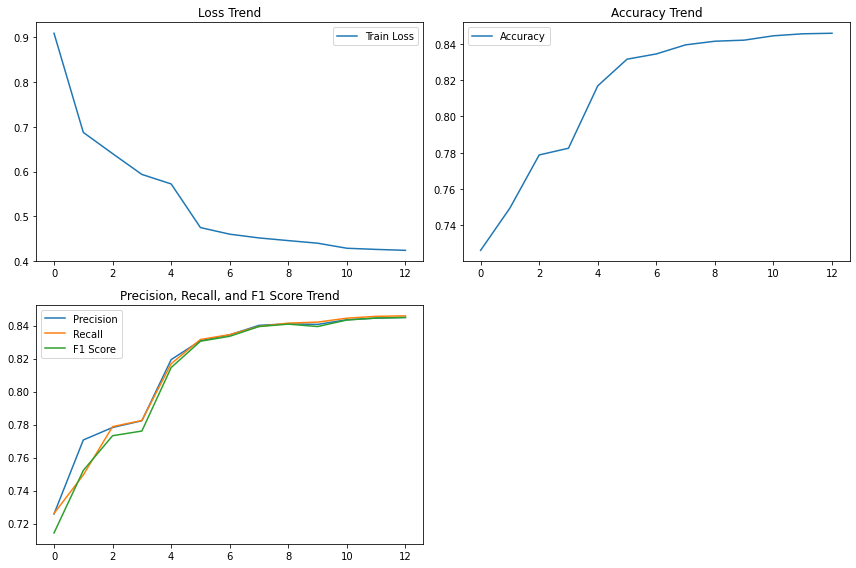

In [20]:

def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=10):
    model = model.to(device)
    num_classes = 10  # 设定类别数量    
    # 初始化记录指标的列表
    history = {
        'train_loss': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        scheduler.step()
        
        model.eval()
        total = correct = 0
        # 初始化TP, FP, FN计数器
        tp = [0] * num_classes
        fp = [0] * num_classes
        fn = [0] * num_classes
        
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                for i in range(len(labels)):
                    if labels[i] == predicted[i]:
                        tp[labels[i]] += 1
                    else:
                        fp[predicted[i]] += 1
                        fn[labels[i]] += 1
        
        precision = [tp[i] / (tp[i] + fp[i]) if (tp[i] + fp[i]) > 0 else 0 for i in range(num_classes)]
        recall = [tp[i] / (tp[i] + fn[i]) if (tp[i] + fn[i]) > 0 else 0 for i in range(num_classes)]
        f1_score = [2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) > 0 else 0 for i in range(num_classes)]
        
        # 计算每个类别的平均精确度、召回率和F1分数
        avg_precision = sum(precision) / num_classes
        avg_recall = sum(recall) / num_classes
        avg_f1_score = sum(f1_score) / num_classes
        # 更新历史记录
        history['train_loss'].append(running_loss / len(train_loader))
        history['accuracy'].append(correct / total)
        history['precision'].append(avg_precision)
        history['recall'].append(avg_recall)
        history['f1_score'].append(avg_f1_score)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Accuracy: {correct / total}, Precision: {avg_precision}, Recall: {avg_recall}, F1 Score: {avg_f1_score}')

    # 绘图
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.legend()
    plt.title('Loss Trend')
    
    plt.subplot(2, 2, 2)
    plt.plot(history['accuracy'], label='Accuracy')
    plt.legend()
    plt.title('Accuracy Trend')
    
    plt.subplot(2, 2, 3)
    plt.plot(history['precision'], label='Precision')
    plt.plot(history['recall'], label='Recall')
    plt.plot(history['f1_score'], label='F1 Score')
    plt.legend()
    plt.title('Precision, Recall, and F1 Score Trend')
    
    plt.tight_layout()
    plt.show()

model = SimpleRNN(input_size=28, hidden_size=150, num_classes=10, dropout_rate=0.5)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# 进行训练和评估
train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=13)


In [ ]:

def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs):
    model = model.to(device)
    num_classes = 10  # 设定类别数量    
    # 初始化记录指标的列表
    history = {
        'train_loss': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        scheduler.step()
        
        model.eval()
        total = correct = 0
        # 初始化TP, FP, FN计数器
        tp = [0] * num_classes
        fp = [0] * num_classes
        fn = [0] * num_classes
        
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                for i in range(len(labels)):
                    if labels[i] == predicted[i]:
                        tp[labels[i]] += 1
                    else:
                        fp[predicted[i]] += 1
                        fn[labels[i]] += 1
        
        precision = [tp[i] / (tp[i] + fp[i]) if (tp[i] + fp[i]) > 0 else 0 for i in range(num_classes)]
        recall = [tp[i] / (tp[i] + fn[i]) if (tp[i] + fn[i]) > 0 else 0 for i in range(num_classes)]
        f1_score = [2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) > 0 else 0 for i in range(num_classes)]
        
        # 计算每个类别的平均精确度、召回率和F1分数
        avg_precision = sum(precision) / num_classes
        avg_recall = sum(recall) / num_classes
        avg_f1_score = sum(f1_score) / num_classes
        # 更新历史记录
        history['train_loss'].append(running_loss / len(train_loader))
        history['accuracy'].append(correct / total)
        history['precision'].append(avg_precision)
        history['recall'].append(avg_recall)
        history['f1_score'].append(avg_f1_score)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Accuracy: {correct / total}, Precision: {avg_precision}, Recall: {avg_recall}, F1 Score: {avg_f1_score}')

    # 绘图
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.legend()
    plt.title('Loss Trend')
    
    plt.subplot(2, 2, 2)
    plt.plot(history['accuracy'], label='Accuracy')
    plt.legend()
    plt.title('Accuracy Trend')
    
    plt.subplot(2, 2, 3)
    plt.plot(history['precision'], label='Precision')
    plt.plot(history['recall'], label='Recall')
    plt.plot(history['f1_score'], label='F1 Score')
    plt.legend()
    plt.title('Precision, Recall, and F1 Score Trend')
    
    plt.tight_layout()
    plt.show()

model = SimpleRNN(input_size=28, hidden_size=150, num_classes=10, dropout_rate=0.5)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# 进行训练和评估
train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=100)


Epoch 1/100, Loss: 1.0266267523836734, Accuracy: 0.7163, Precision: 0.7235393648370689, Recall: 0.7162999999999999, F1 Score: 0.7014075812791092
Epoch 2/100, Loss: 0.6684330513418865, Accuracy: 0.7621, Precision: 0.7720955971911285, Recall: 0.7621, F1 Score: 0.7487082170510205
Epoch 3/100, Loss: 0.5624158990376794, Accuracy: 0.8096, Precision: 0.8166572542846431, Recall: 0.8096, F1 Score: 0.80771761902306
Epoch 4/100, Loss: 0.518524062468299, Accuracy: 0.7811, Precision: 0.7997885797175629, Recall: 0.7811, F1 Score: 0.783720556329212
Epoch 5/100, Loss: 0.5067416256520031, Accuracy: 0.8341, Precision: 0.8333848592694485, Recall: 0.8341, F1 Score: 0.8294588167760683
Epoch 6/100, Loss: 0.42210750618596066, Accuracy: 0.8455, Precision: 0.8451506666189144, Recall: 0.8455, F1 Score: 0.8429337487832308
Epoch 7/100, Loss: 0.40732296703975085, Accuracy: 0.85, Precision: 0.8490384617940151, Recall: 0.85, F1 Score: 0.8484994566398785
Epoch 8/100, Loss: 0.39681976530025764, Accuracy: 0.8557, Preci

Epoch 62/100, Loss: 0.36840532311816204, Accuracy: 0.8603, Precision: 0.8587553516670374, Recall: 0.8603, F1 Score: 0.8589678569389572
Epoch 63/100, Loss: 0.3667285686680503, Accuracy: 0.8603, Precision: 0.8587553516670374, Recall: 0.8603, F1 Score: 0.8589678569389572
Epoch 64/100, Loss: 0.36729051204505503, Accuracy: 0.8603, Precision: 0.8587553516670374, Recall: 0.8603, F1 Score: 0.8589678569389572
Epoch 65/100, Loss: 0.3692460378159338, Accuracy: 0.8603, Precision: 0.8587553516670374, Recall: 0.8603, F1 Score: 0.8589678569389572
Epoch 66/100, Loss: 0.3656463076009044, Accuracy: 0.8603, Precision: 0.8587553516670374, Recall: 0.8603, F1 Score: 0.8589678569389572
Epoch 67/100, Loss: 0.3699465818655516, Accuracy: 0.8603, Precision: 0.8587553516670374, Recall: 0.8603, F1 Score: 0.8589678569389572
Epoch 68/100, Loss: 0.3676843053575899, Accuracy: 0.8603, Precision: 0.8587553516670374, Recall: 0.8603, F1 Score: 0.8589678569389572
Epoch 69/100, Loss: 0.3658765731081525, Accuracy: 0.8603, Pr